## Notebook to run main results
For each experiment, first the mean field (ideal) solution is shown with its associated lambda, than, the Model Predictive Control (MPC) solution, on the real dataset, is shown with its associated lambda.

### Electrical Vehicles


Score :  0.6477233099334126  achieved in  200  times


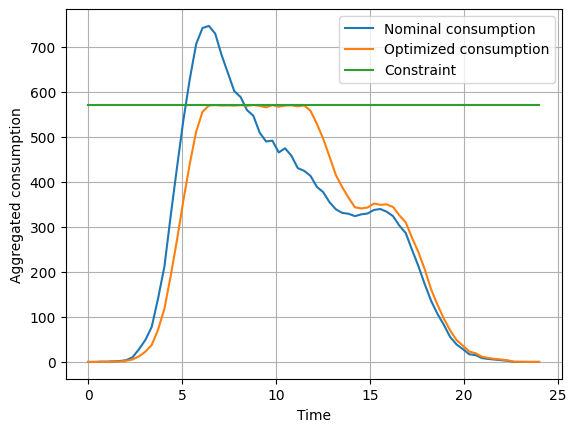

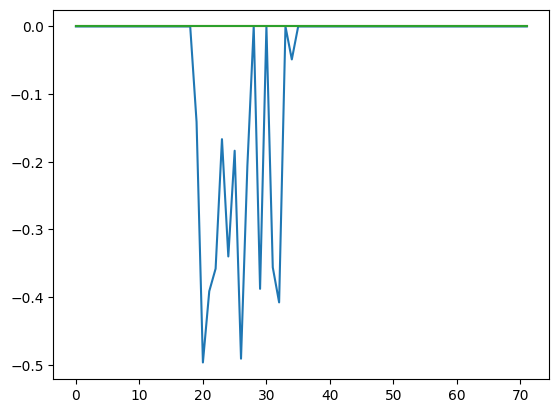

Score :  0.13707066823312375  achieved in  200  times
Score :  0.0374540387946104  achieved in  200  times
Score :  0.010453147139493238  achieved in  200  times
Score :  0.0  achieved in  1  times
Score :  0.0  achieved in  1  times
Score :  0.0  achieved in  1  times
Score :  0.0  achieved in  1  times
Score :  0.0  achieved in  1  times
Score :  0.0  achieved in  1  times
Score :  0.0  achieved in  1  times
Score :  0.0  achieved in  1  times
Score :  0.0  achieved in  1  times
Score :  0.0  achieved in  1  times
Score :  0.0  achieved in  1  times
Score :  0.0  achieved in  1  times
Score :  0.0  achieved in  1  times
Score :  0.0  achieved in  1  times
Score :  0.0  achieved in  1  times
Score :  2.6576470445579825  achieved in  200  times
Score :  3.7940319131184608  achieved in  200  times
Score :  2.2662080814997543  achieved in  200  times
Score :  0.06649740177266494  achieved in  200  times
Score :  0.9910212417473991  achieved in  200  times
Score :  0.6183601136550578  ach

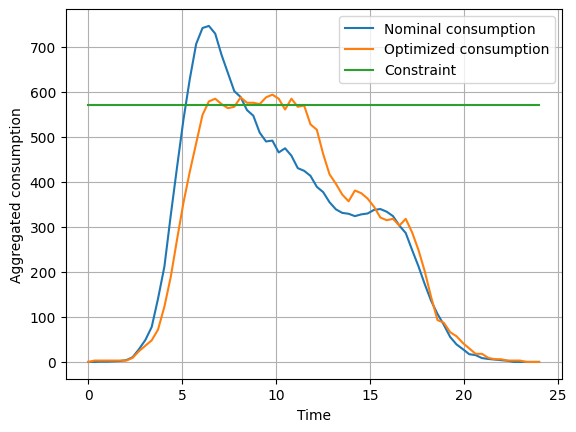

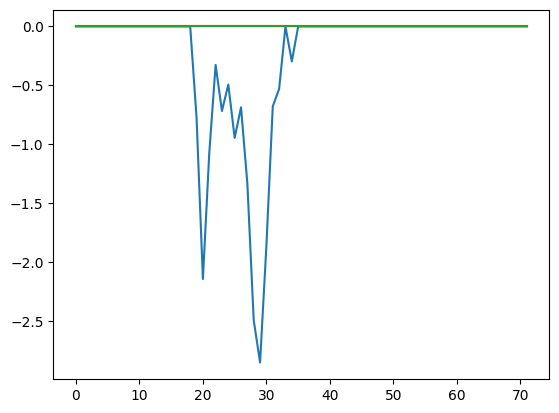

In [1]:
import torch
import yaml

torch.set_default_dtype(torch.float64)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_device(device)

from src.core.configuration import Config

from src.experiments.RealEVs.lbda_update import MPCEVLbdaUpdate
from src.experiments.RealEVs.model import  MPCEVModel


with open("src/experiments/RealEVs/config.yaml") as file:
    config = yaml.safe_load(file)
cfg = Config(config)

Td=torch.linspace(0,cfg.Nt2,cfg.Nt2)
R2 = 190+Td*0

lbda = MPCEVLbdaUpdate(cfg,R2,None,"gradient control", forward_max_grad=10000, backward_max_grad=10000)

model = MPCEVModel(cfg,lbda)
G_EVs = model.MPC()
lbda.plotResult(G_EVs)
lbda.plot()
    

### Water Heaters

Score :  0.03242307134409601  achieved in  100  times


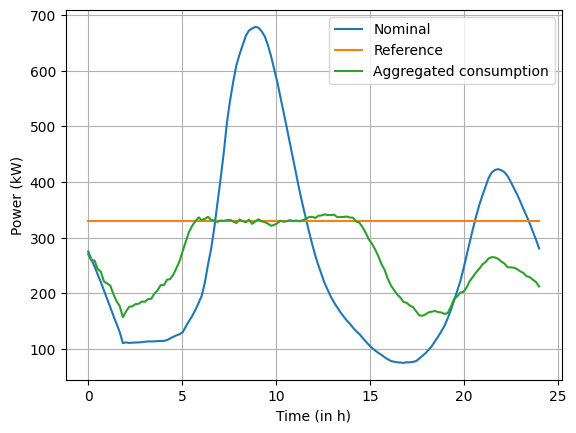

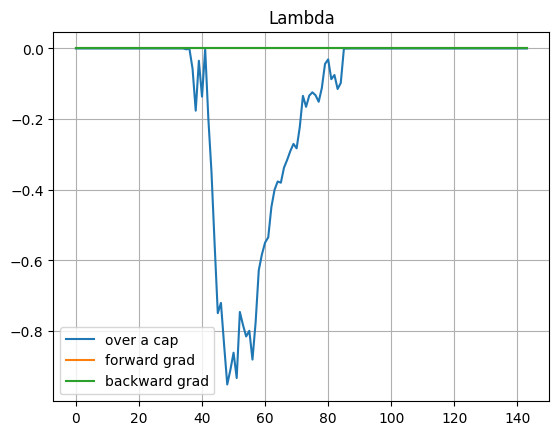

At time step  0 , Nb time left :  7994  /  8000
Score :  0.024779846950833746  achieved in  100  times
At time step  1 , Nb time left :  7981  /  8000
Score :  0.02101301079546893  achieved in  100  times
At time step  2 , Nb time left :  7972  /  8000
Score :  0.010593251742556148  achieved in  100  times
At time step  3 , Nb time left :  7962  /  8000
Score :  0.021543470895322048  achieved in  100  times
At time step  4 , Nb time left :  7960  /  8000
Score :  0.01716648490985539  achieved in  100  times
At time step  5 , Nb time left :  7946  /  8000
Score :  0.012053480152520203  achieved in  100  times
At time step  6 , Nb time left :  7939  /  8000
Score :  0.013525710019863694  achieved in  100  times
At time step  7 , Nb time left :  7927  /  8000
Score :  0.013603032560398047  achieved in  100  times
At time step  8 , Nb time left :  7917  /  8000
Score :  0.020694818910835296  achieved in  100  times
At time step  9 , Nb time left :  7902  /  8000
Score :  0.0227114321373752

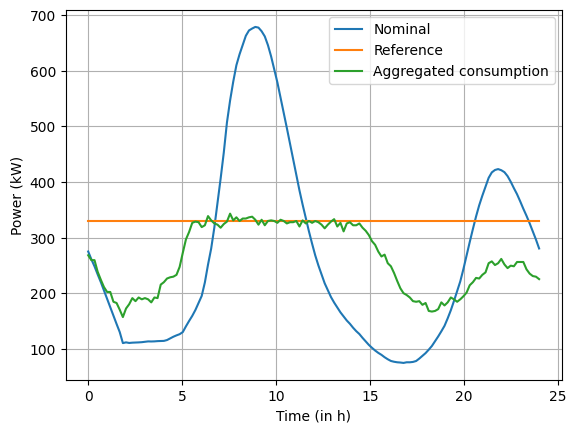

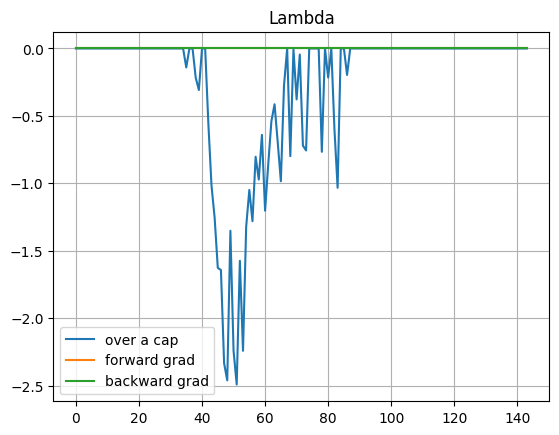

In [2]:
import torch
import yaml

torch.set_default_dtype(torch.float64)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_device(device)

from src.core.configuration import Config

from src.experiments.WHs.drains import Drains
from src.experiments.WHs.lbda_update import LbdaUpdate,DeepLambda 
from src.experiments.WHs.temperature_markov import TMarkov
from src.experiments.WHs.state_markov import SMarkov

from src.experiments.WHs.model import Model

with open("src/experiments/WHs/config.yaml") as file:
    config = yaml.safe_load(file)
cfg = Config(config)

drains = Drains(cfg, device)

tmarkov = TMarkov(cfg,drains)
smarkov = SMarkov(cfg, tmarkov)
R1=torch.mean(smarkov.DrawX(100000, deterministic=False)[0],1,keepdim=True)

Td=torch.linspace(0,cfg.Nt,cfg.Nt)[:,None,None]

R2 = 0*Td + 0.3
lbda = LbdaUpdate(cfg,R2,R1,"gradient control",forward_max_grad=100000,backward_max_grad=100000)
model = Model(cfg,smarkov,lbda)

G_WHs = model.MPC(1000,100, nb_switches=8, verbose=True, tknowledge=1000)
#G_WHs = model.learn(1000,100, nb_time_left=8)
lbda.plotResult(G_WHs)
lbda.plot()


### Naive combination of EVs and WHs by summing their separate optimization

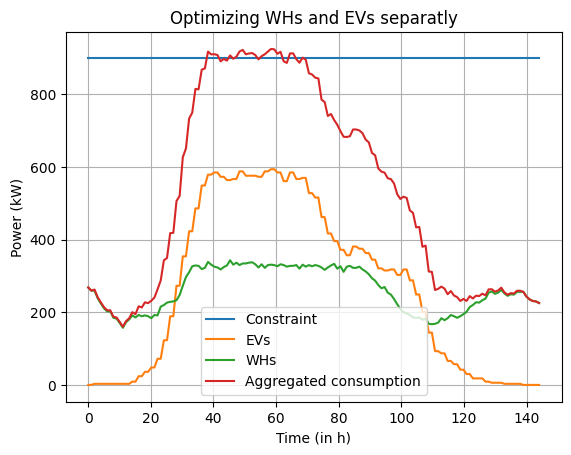

In [3]:
from src.core.utils import write_to_txt
import matplotlib.pyplot as plt

Rtot = 190 * 3 + 0.3 * 1100 + Td*0
            
plt.plot(Td[:,0,0].cpu(),Rtot[:,0,0].cpu(),label='Constraint')
G_EVs_repeated = torch.repeat_interleave(G_EVs,2,0)
plt.plot(Td[:,0,0].cpu(),G_EVs_repeated.cpu()*3,label="EVs")
plt.plot(Td[:,0,0].cpu(),G_WHs[:,0,0].cpu()*1100,label="WHs")
Gtot = G_EVs_repeated.cpu()*3 + G_WHs[:,0,0].cpu()*1100
plt.plot(Td[:,0,0].cpu(),Gtot,label="Aggregated consumption")
plt.title("Optimizing WHs and EVs separatly")
plt.legend()
plt.grid()
plt.xlabel("Time (in h)")
plt.ylabel("Power (kW)")
plt.show()

### Combination of Water Heaters and Electrical Vehicles

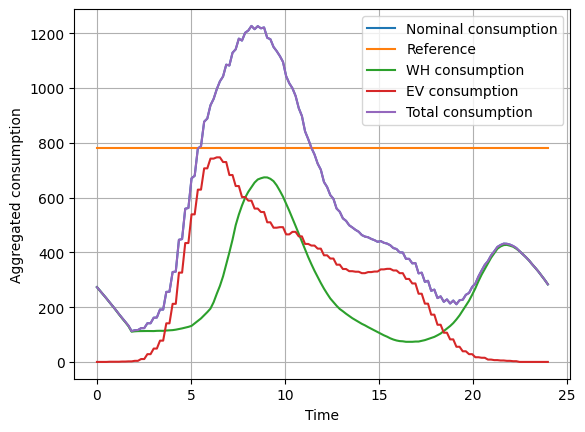

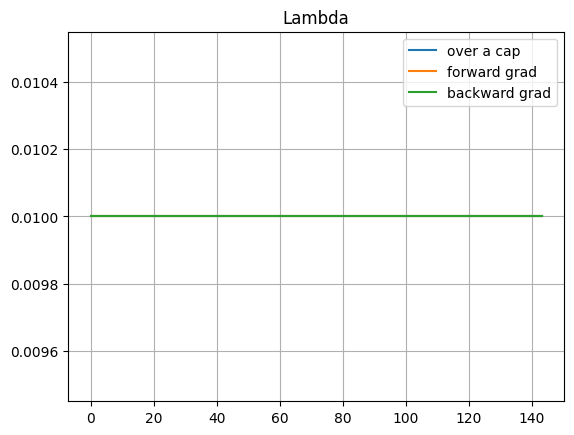

Score :  54.1607108598567  achieved in  100  times


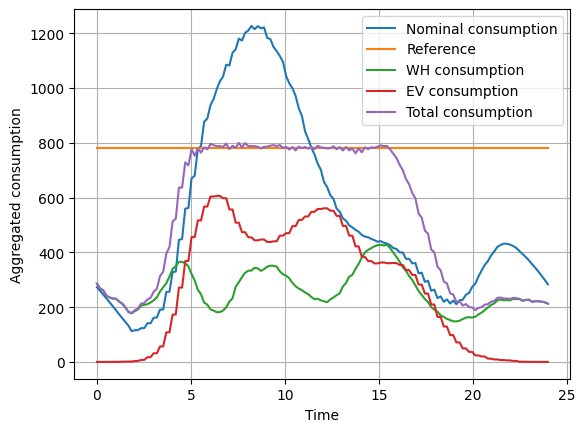

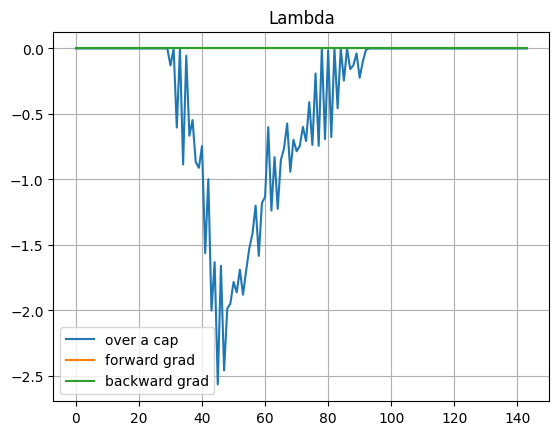

At time step  0 , Nb time left :  7993  /  8000
Score :  37.92922067791111  achieved in  100  times
At time step  1 , Nb time left :  7984  /  8000
Score :  34.93812915346127  achieved in  100  times
At time step  2 , Nb time left :  7973  /  8000
Score :  41.86534429854142  achieved in  100  times
At time step  3 , Nb time left :  7967  /  8000
Score :  41.039685128627795  achieved in  100  times
At time step  4 , Nb time left :  7957  /  8000
Score :  34.741745275964966  achieved in  100  times
At time step  5 , Nb time left :  7943  /  8000
Score :  35.54194428332836  achieved in  100  times
At time step  6 , Nb time left :  7938  /  8000
Score :  36.754824890926116  achieved in  100  times
At time step  7 , Nb time left :  7924  /  8000
Score :  49.47653648955568  achieved in  100  times
At time step  8 , Nb time left :  7913  /  8000
Score :  47.32734687993745  achieved in  100  times
At time step  9 , Nb time left :  7904  /  8000
Score :  38.41123212748672  achieved in  100  tim

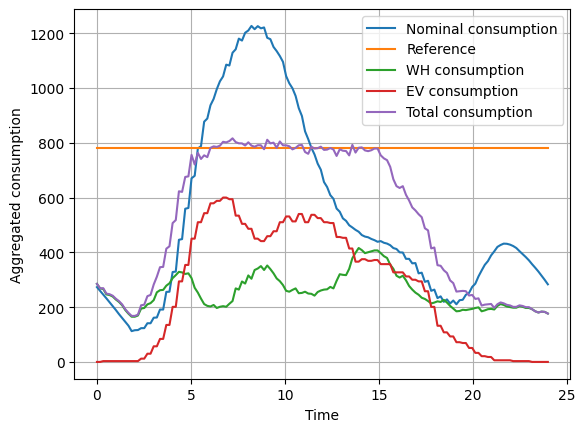

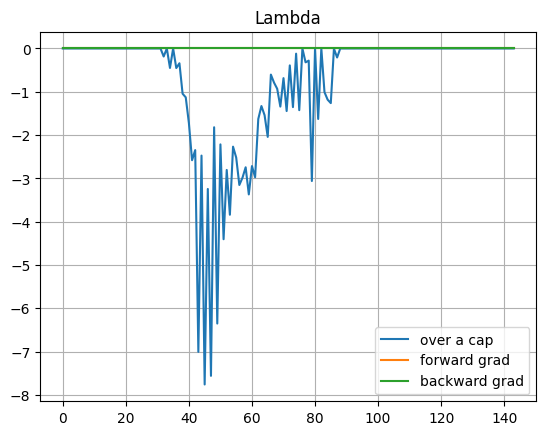

In [4]:
import torch
import yaml

torch.set_default_dtype(torch.float64)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_device(device)

from src.core.configuration import Config

from src.experiments.WHs.drains import Drains
from src.experiments.WHs.temperature_markov import TMarkov
from src.experiments.WHs.state_markov import SMarkov

from src.experiments.RealEVsandWHs.lbda_update import MPCCoupledLambda
from src.experiments.RealEVsandWHs.model import MPCCoupledModel


with open("src/experiments/RealEVsandWHs/config.yaml") as file:
    config = yaml.safe_load(file)
cfg = Config(config)

drains = Drains(cfg, device)

tmarkov = TMarkov(cfg,drains)
smarkov = SMarkov(cfg, tmarkov)
R1=torch.mean(smarkov.DrawX(100000, deterministic=False)[0],1,keepdim=True)

Td=torch.linspace(0,cfg.Nt,cfg.Nt)[:,None,None]

Td=torch.linspace(0,cfg.Nt,cfg.Nt)[:,None,None]
R2=780 + Td*0
lbda = MPCCoupledLambda(cfg,R2,R1,"gradient control", forward_max_grad=10000, backward_max_grad=10000)

model = MPCCoupledModel(cfg,smarkov,lbda)
lbda.plotResult()
lbda.plot()

G_H_WHs = model.MPC(1000,200, nb_switches=8, verbose=True)
lbda.plotResult(G_H_WHs)
lbda.plot()
